<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b>Principal Component Analysis (PCA)</b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>January 23, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. Motivation
<hr style="height:1px;border:none" />

Say, your data consists of a number of correlated variables. A **principal component analysis** (**PCA**) allows you to transform such data into a small number of uncorrelated variables, known as **principal components**. Principal components (PCs) are ordered so that the first PC explains the most variability in the data, the second PC explaining the second most variability, and so on. A PCA is this considered a *dimension reduction method*, transforming a high-dimensional data set into a lower dimensional space.

## Iris data
This is a famous data set with the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in `Scikit-learn`. The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots. Those who are using Jupyter notebook need to run this line.

In [2]:
%matplotlib inline

Here is a program to plot data, all the features against each other.

`<IrisDataPlot.py>`

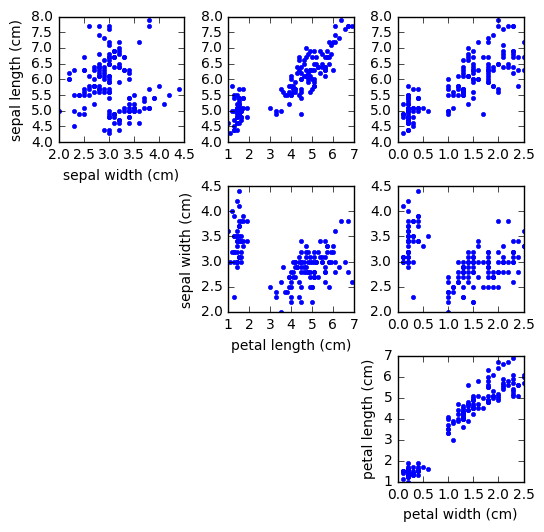

In [2]:
# Plotting the iris data

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# loading the iris data set
iris = datasets.load_iris()
X = iris.data   # 2D data array
varNames = iris.feature_names  # variable names
nVar = X.shape[1]  # number of features

# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        plt.plot(X[:,iCol], X[:,iRow], 'b.')
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)


plt.show()


You notice that these features are correlated. You may also notice that how cumbersome it is just to examine the data set. The more features you have, the more complicated the plots become. So perhaps we can generate a *summary* feature encompassing variability of all these features. 

Here is a simple program to perform a PCA on this data set.

`<IrisPCA.py>`

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

# loading the iris data
iris = datasets.load_iris()
X = iris.data   # 2D data array


# applying PCA
pca = PCA(n_components=2)  # creating a PCA transformation with 2 PCs
X_r = pca.fit_transform(X) # fit the data, get 2 PCs

Here, **`PCA`** is a transformation object. We are interested in determining the largest 2 PCs, so we set **`n_components=2`**. In theory, the number of PCs we can determine is the number of features in the data set. Once the PCA object is defined as **`pca`**, then the **`fit_transform`** method is used to determine the transformation from the original data set to the collection of PCs. 

The PCs are stored in a 2D array **`X_r`**.

In [4]:
X_r.shape

(150, 2)

The number of rows corresponds to the number of observations, and the number of columns corresponds to the number of PCs (2 in this case).

In [5]:
# proportion of the variance explained
print(pca.explained_variance_ratio_)

[ 0.92461621  0.05301557]


Here, the attribute **`explained_variance_ratio_`** stores the amount of variability in the data explained by each PC. The first PC explains 92% of variability,  whereas the second PC explains a little over 5%.

In [6]:
# PCs are uncorrelated
print(np.corrcoef(X_r, rowvar=False))

[[  1.00000000e+00  -1.98864115e-17]
 [ -1.98864115e-17   1.00000000e+00]]


Here, we see that the two PCs are uncorrelated, with very a very small correlation coefficient.

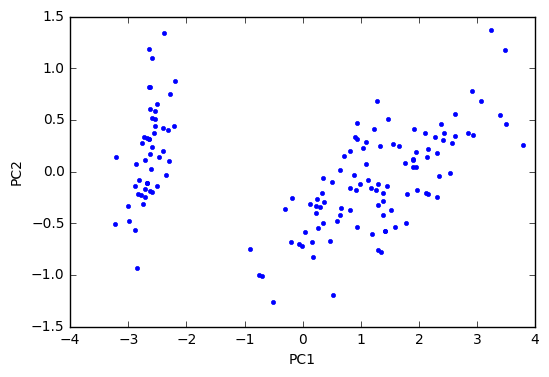

In [7]:
# plotting PCs
plt.plot(X_r[:,0], X_r[:,1],'b.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Here, PC1 and PC2 are plotted. This plot may not mean much, until we add the target information (i.e., different types of irises) to the plot.

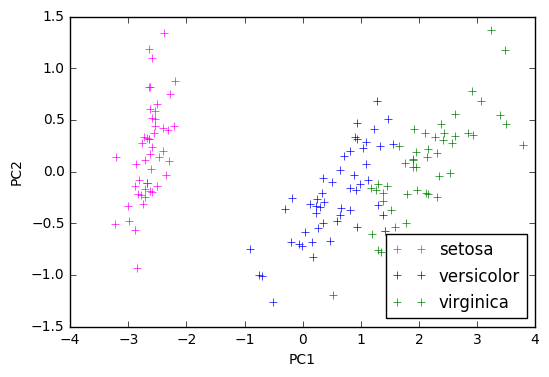

In [9]:
# plotting PCs with the target
Y = iris.target
targetNames = iris.target_names
targetColors = ['magenta', 'blue', 'green']
for iTarget in range(3):
    plt.plot(X_r[Y==iTarget,0],X_r[Y==iTarget,1], marker='+', ls='none',
         c=targetColors[iTarget], label=targetNames[iTarget])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=4)
plt.show()

As you can see, different types of irises tend to *cluster* into groups. A PCA is able to separate these groups to a certain degree.

What exactly are PC1 and PC2? In a nutshell, these are *linear combinations* of features. You can examine these linear combinations by

In [12]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Here, the first row describes the linear combination of features for PC1. The second row corresponds to PC2. In a technical term, they are often referred as *eigenvectors*.

# 2. Examples
<hr style="height:1px;border:none" />

## Seed data

Here is another example of PCA. The data set **`seeds_dataset.txt`** contains 210 observations with 7 features of wheat kernels. The features are

  1. area
  2. perimeter
  3. compactness
  4. length of kernel
  5. width of kernel
  6. asymmetry coefficient
  7. length of kernel groove

There are three kinds of wheat kernels (N=70 each), indicated by the 8th column of the data (1=Kama, 2=Rosa and 3=Canadian). 

<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;">Source: UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/seeds </p>

Here is a code snippet to load the data set.

`<SeedPCA.py>`

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# loadin the data
seedData = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
seedFeatures = np.array(seedData.iloc[:,:7])
seedTargets = np.array(seedData.iloc[:,7])
targetNames = ['Kama','Rosa','Canadian']
targetColors = ['red','blue','green']

### Exercise
1. **Plotting features**. Select two columns randomly from the data array, and produce a scatter plot. Do you see any correlation or linear association between the selected features?
2. **PCA of the seed data**. Perform a PCA on this data set, generating 7 PCs, stored in a 2D array called **`seedPCs`**. Determine how much variability is explained by each of these PCs.

As we plot the first 2 PCs (explaining a substantial portion of variability), we can see that different types of wheats are clustered. 

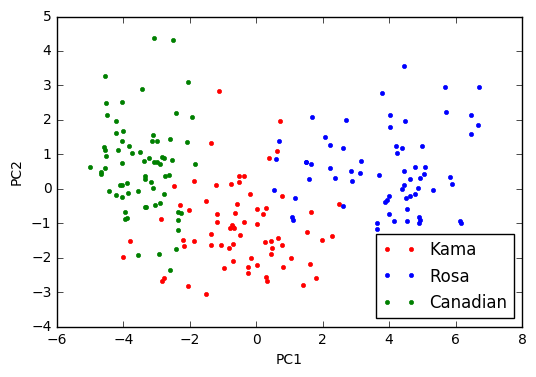

In [18]:
# plotting the first 2 PCs
for iTarget in np.arange(1,4):
    plt.plot(seedPCs[seedTargets==iTarget,0],
             seedPCs[seedTargets==iTarget,1],
             marker='.', ls='none',
             c=targetColors[iTarget-1], label=targetNames[iTarget-1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=4)
plt.show()

## Seed data, scaled

In the seed data, the features have different scales, as manifested by different magnitudes of means and standard deviations (SD).

In [19]:
seedData.iloc[:,:7].describe()

,0,1,2,3,4,5,6
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


For example, features 0 & 1 have larger means and SD. You may encounter such differences in feature magnitudes in your data set (e.g., response time in ms, subjects' age in years). 

How does this affect PCA? Let's take a look at the first two PCs.

In [22]:
seedPCA.components_[0,:]

array([ 0.8842285 ,  0.39540542,  0.00431132,  0.12854448,  0.11105914,
       -0.12761562,  0.1289665 ])

In [23]:
seedPCA.components_[1,:]

array([ 0.10080577,  0.05648963, -0.00289474,  0.03062173,  0.00237229,
        0.98941048,  0.08223339])

In PC1, features #0 and #1 contribute more than the other features. In PC2, feature #5 dominates. It is unclear whether these features are truly important, or due do the difference in means and SDs. Thus, it is a good idea to *standardize* (i.e., calculate Z-score, or subtract the mean and divide by the SD) each feature before PCA. There is a transformation object **`StandardScaler`** that implements standardization. 

`<SeedPCAScaled.py>`

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# loadin the data
seedData = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
seedFeatures = np.array(seedData.iloc[:,:7])
seedTargets = np.array(seedData.iloc[:,7])
targetNames = ['Kama','Rosa','Canadian']
targetColors = ['red','blue','green']


seedFeaturesNorm = StandardScaler().fit_transform(seedFeatures)

When we examine the scaled features **`seedFeaturesNorm`**, we see that each feature has zero mean and unit SD. 

In [27]:
pd.DataFrame(seedFeaturesNorm).describe()

,0,1,2,3,4,5,6
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-3.383537e-16,1.184238e-16,1.285744e-15,-2.097793e-15,-3.045183e-16,-6.767074e-17,-9.198991e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


Then we can perform PCA.

In [28]:
seedPCA = PCA(n_components=7)
seedPCs = seedPCA.fit_transform(seedFeaturesNorm)

Let's examine the first 2 PCs.

In [29]:
seedPCA.components_[:2,:]

array([[ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
        -0.11869248,  0.38716084],
       [-0.02656355, -0.08400282,  0.52915125, -0.20597518,  0.11668963,
        -0.71688203, -0.37719327]])

Unlike the PCs with the unscaled data, all features seem to contribute. Now let's plot the first two PCs.

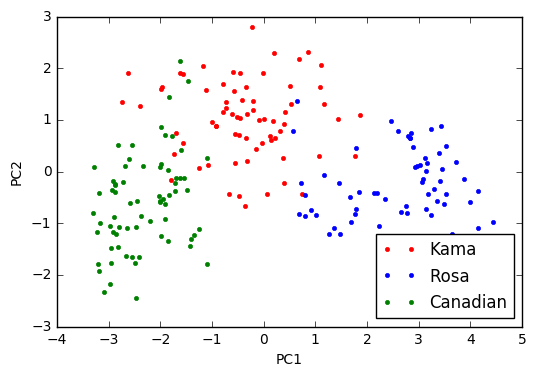

In [30]:
# plotting the first 2 PCs
for iTarget in np.arange(1,4):
    plt.plot(seedPCs[seedTargets==iTarget,0],
             seedPCs[seedTargets==iTarget,1],
             marker='.', ls='none',
             c=targetColors[iTarget-1], label=targetNames[iTarget-1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=4)
plt.show()

Do you notice any difference compared to the earlier plot?

### Exercise

**Explained variance, with or without scaling**. Calculate the explained variance for the first 2 PCs in the PCA for the seed data, with or without scaling 

# 3. Dimension reduction with PCA
<hr style="height:1px;border:none" />

PCA is useful in projecting a high-dimensional data set to a lower dimensional space, a.k.a., *dimension reduction*. To demonstrate this, we shall examine the digits data set available in `Scikit-learn`. This data set contains 1797 observations of hand-written digits (0-9). Each observation is an 8x8 image of a hand-written digit, on a 16-level gray scale. Here are some examples of the digit data.

`<DigitsPCA.py>`

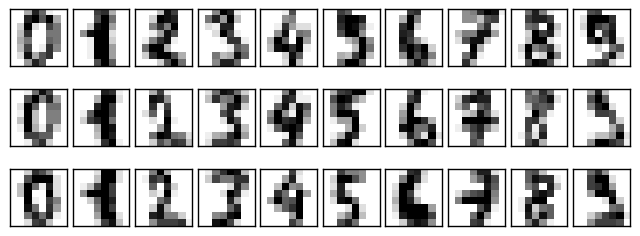

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA


# loading the digits data
digits = datasets.load_digits()
digitsX = digits.data    # the data, 1797 x 64 array
digitsImages = digits.images  # image data, 1797 x 8 x 8
digitsTargets = digits.target # target information
digitsFeatureNames = digits.target_names  # digits


# examples of the digits data
plt.figure(figsize=(8,3))
for iImg in range(3):
    for jImg in range(10):
        plt.subplot(3,10,iImg*10+jImg+1)
        plt.imshow(digitsImages[iImg*10+jImg], cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Now let's run a PCA with 2 components, and plot the resulting PCs.

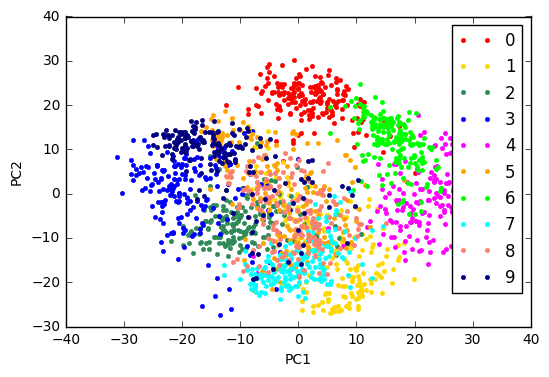

In [32]:
# PCA with largest 2 PCs
digitsPCA = PCA(n_components=2)
digitsPCs = digitsPCA.fit_transform(digitsX)


# plotting the PCs
targetColors=['red','gold','seagreen','blue','fuchsia',
              'orange','lime','cyan','salmon','navy']
for i in range(10):
    plt.plot(digitsPCs[digitsTargets==i,0],
             digitsPCs[digitsTargets==i,1],
             marker='.', ls='none', c=targetColors[i],
             label=digitsFeatureNames[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

As you can see, some digits can be separated easily from other digits (e.g., 0, 4, and 6), whereas some digits are hard to distinguish. 

Now let's take a look at the *eigenimages* corresponding to PC1 and PC2.

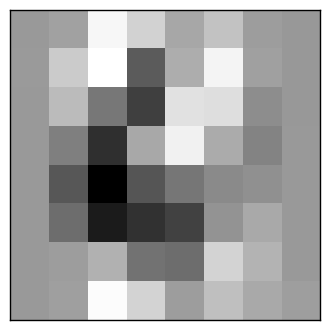

In [34]:
# PC1 eigenimage
plt.imshow(digitsPCA.components_[0,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()

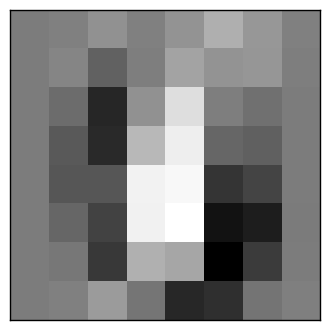

In [33]:
# PC2 eigenimage
plt.imshow(digitsPCA.components_[1,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()

In these eigenimages, darker pixels are the pixels contributing large variability, whereas lighter pixels contribute small variability.

### Exercise
1. **Explaind variance plot**. Run a PCA on the digits data set with 64 components. Then plot the resulting explained variance ratios from the 1st to 64th PC. This plot is known as a ***Scree plot***.
2. **Cumulative explained variance**. Run a PCA on the digits data set with 64 components. Using the cumulative sum function in NumPy, **`np.cumsum`**, calculate the cumulative explained variance from the 1st to 64th PC. Plot the resulting cumulative explained variance in a graph.


# 4. How many components?
<hr style="height:1px;border:none" />

When you run a PCA, one of the major questions is to determine *how many components* are needed to adequately represent the data. While there are many different ways to answer this questions, we can briefly go over two approaches.

## Scree plot
You produce a Scree plot for your data, and figure out where the plot *elbows*, or the slope becomes less steep. Here is a Scree plot from a PCA with 7 components for the seed data (scaled).

`<ScreePlot.py>`

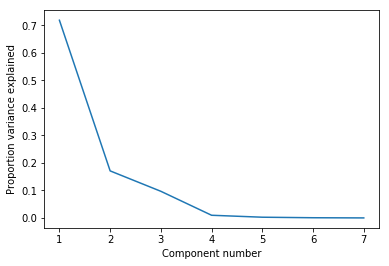

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# loading the data and standarsizing
seedData = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
seedFeatures = np.array(seedData.iloc[:,:7])
seedFeaturesNorm = StandardScaler().fit_transform(seedFeatures)

# PCA
seedPCA = PCA(n_components=7)
seedPCs = seedPCA.fit_transform(seedFeaturesNorm)

# Scree plot
plt.plot(np.arange(1,8), seedPCA.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Proportion variance explained')
plt.show()

Here, you can see the elbow at PC2. So you can conclude that you want to use 2 PCs.

## Proportion explained variability

Another criterion is that you want to choose the fewest PCs that can explain a certain proportion of variability (e.g., >90%). Here is the cumulative explained variance plot from the seed data analysis you just saw.

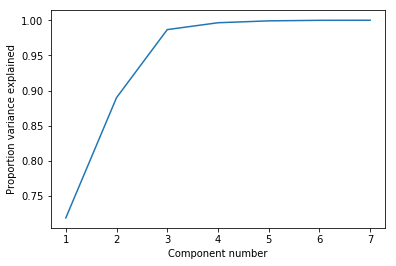

In [5]:
# Cumulative explained variance
plt.plot(np.arange(1,8), np.cumsum(seedPCA.explained_variance_ratio_))
plt.xlabel('Component number')
plt.ylabel('Proportion variance explained')
plt.show()

Say, your criterion is that you want your PCs to explain 90% or more of the variability in the data. In that case, you will need 3 PCs to meet the criterion.